In [2]:
# Apprentissage Supervisé

Valeur cible 1 :  id_code_insee  -  8258
Valeur cible 2 :  Num_Acc  -  40250
Valeur cible 3 :  num_veh  -  58
Valeur cible 4 :  id_usa  -  73643
Valeur cible 5 :  date  -  29950
Valeur cible 6 :  ville  -  8078
Valeur cible 7 :  latitude.x  -  1253
Valeur cible 8 :  longitude.x  -  1495
Valeur cible 9 :  descr_cat_veh  -  24
Valeur cible 10 :  descr_agglo  -  2
Valeur cible 11 :  descr_athmo  -  9
Valeur cible 12 :  descr_lum  -  5
Valeur cible 13 :  descr_etat_surf  -  9
Valeur cible 14 :  description_intersection  -  9
Valeur cible 15 :  an_nais  -  101
Valeur cible 16 :  age  -  101
Valeur cible 17 :  place  -  10
Valeur cible 18 :  descr_dispo_secu  -  15
Valeur cible 19 :  descr_grav  -  4
Valeur cible 20 :  descr_motif_traj  -  6
Valeur cible 21 :  descr_type_col  -  7
Valeur cible 22 :  department_name  -  89
Valeur cible 23 :  department_number  -  89
Valeur cible 24 :  region_name  -  17
Nombre d'instances :  73643


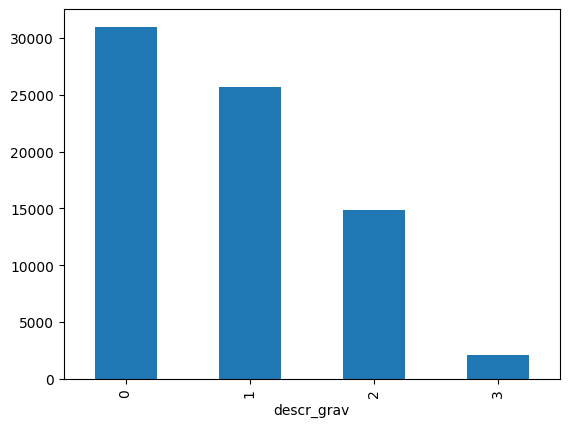

Taille des features :  23
  id_code_insee       Num_Acc num_veh  id_usa            date  \
0         10100  200900035904     A01  823507  20090803130000   
1         10100  200900004313     A01  752937  20090227223000   
2         10102  200900005197     A01  754945  20090113160000   
3         10102  200900005197     B02  754947  20090113160000   
4         10102  200900005206     A01  754970  20090209201500   

              ville  latitude.x  longitude.x  descr_cat_veh  descr_agglo  ...  \
0            CLEREY     48.2000          4.2              2            1  ...   
1            CLEREY     48.2000          4.2              3            2  ...   
2  COLOMBE LA FOSSE     48.2667          4.8              3            2  ...   
3  COLOMBE LA FOSSE     48.2667          4.8              3            2  ...   
4  COLOMBE LA FOSSE     48.2667          4.8              6            2  ...   

   an_nais   age  place                         descr_dispo_secu  descr_grav  \
0   1952.0  57.0

In [1]:
%run preparation.ipynb
data = dataframe

In [2]:

#Importation des librairies
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#data =pandas.read_csv("export_IA.csv", sep=",")

#data.info()
data.head(5)

,id_code_insee,Num_Acc,id_usa,date,latitude.x,longitude.x,descr_cat_veh,descr_agglo,descr_athmo,descr_lum,...,description_intersection,an_nais,age,place,descr_dispo_secu,descr_grav,descr_motif_traj,descr_type_col,department_number,region_number
0,10100,200900035904,823507,20090803130000,48.2000,4.2,2,1,4,2,...,1,1952.0,57.0,1.0,0,0,1,0,10,44
1,10100,200900004313,752937,20090227223000,48.2000,4.2,3,2,4,3,...,1,1952.0,57.0,1.0,0,2,9,1,10,44
2,10102,200900005197,754945,20090113160000,48.2667,4.8,3,2,5,2,...,2,1969.0,40.0,1.0,0,2,5,2,10,44
3,10102,200900005197,754947,20090113160000,48.2667,4.8,3,2,5,2,...,2,1939.0,70.0,1.0,0,0,5,2,10,44
4,10102,200900005206,754970,20090209201500,48.2667,4.8,6,2,6,1,...,4,1966.0,43.0,1.0,1,1,1,3,10,44


In [3]:
import pandas as pandas
#CREATION D"UN ECHANTILLOn AFIN DE REALISER DES TESTS DE GRIDSEARCH
sample = data
#sample.info()
count1 = sum(sample['descr_grav'] == 0)
count2 = sum(sample['descr_grav'] == 1)
count3 = sum(sample['descr_grav'] == 2)
count4 = sum(sample['descr_grav'] == 3)
#print(count1,count2,count3,count4, count1+count2+count3+count4)

#Choix du pourcentage de l'échantillon par rapport a la tabe initiale: ici 10% (0.1)
sample_size = 0.04
sample1 = sample.query('descr_grav == 0').sample(n=int(count1 * sample_size), random_state=25)
sample2 = sample.query('descr_grav == 1').sample(n=int(count2 * sample_size), random_state=25)
sample3 = sample.query('descr_grav == 2').sample(n=int(count3 * sample_size), random_state=25)
sample4 = sample.query('descr_grav == 3').sample(n=int(count4 * sample_size), random_state=25)
final_sample = pandas.concat([sample1, sample2, sample3, sample4])
#final_sample.info()
sample_target = final_sample.pop('descr_grav')
sample_target.info()
X_train_sample, X_test_sample,y_train_sample, y_test_sample = train_test_split(final_sample,sample_target, test_size=0.2, random_state=25)


<class 'pandas.core.series.Series'>
Index: 2944 entries, 30308 to 65689
Series name: descr_grav
Non-Null Count  Dtype
--------------  -----
2944 non-null   int64
dtypes: int64(1)
memory usage: 46.0 KB


In [4]:
#Recuperation de la valeur qui va nous servir de targer: la gravité de l'accident
target = data.pop("descr_grav")


In [5]:
#Holdout
#Repartition des données en 5 jeux de données (avec un random_state différent afin de ne pas orbtenir les memes jeux de données)
X_train1, y_train1, X_test1, y_test1 = train_test_split(data,target, test_size=0.2, random_state=10)
X_train2, y_train2, X_test2, y_test2 = train_test_split(data,target, test_size=0.2, random_state=21)
X_train3, y_train3, X_test3, y_test3 = train_test_split(data,target, test_size=0.2, random_state=32)
X_train4, y_train4, X_test4, y_test4 = train_test_split(data,target, test_size=0.2, random_state=43)
X_train5, y_train5, X_test5, y_test5 = train_test_split(data,target, test_size=0.2, random_state=54)


#Librairies utiles aux 3 classifications:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score





# Step 4: Flatten the y_train array
#y_train = np.ravel(y_train)

# Step 5: Train the SVM classifier using the training data
#svm.fit(X_train, y_train)

# Step 6: Make predictions on the test data
#y_pred = svm.predict(X_test)

# Step 7: Evaluate the performance of the classifier
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)






In [9]:
X_train, X_test,y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=50)


In [8]:
svm = SVC()
rf = RandomForestClassifier()
mlp = MLPClassifier()

#Creation de vecteurs afin de stocker les scores de chaque jeu de données
average_SVM = []
average_RF = []
average_MLP = []

for i in range(5):
    X_train, X_test,y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=i*10)
    svm.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    mlp.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)
    print("Jeu de donné ", i+1)
    score_svm = accuracy_score(y_test, y_pred_svm)
    score_rf = accuracy_score(y_test, y_pred_rf)
    score_mlp = accuracy_score(y_test, y_pred_mlp)
    print("Accuracy SVM:", score_svm)
    average_SVM.append(score_svm)
    average_RF.append(score_rf)
    average_MLP.append(score_mlp)
    print("Accuracy RF:", score_rf)
    print("Accuracy MLP:", score_mlp)
    print("")


print("Moyenne SVM:", np.mean(average_SVM))
print("Moyenne RF:", np.mean(average_RF))
print("Moyenne MLP:", np.mean(average_MLP))

Jeu de donné  1
Accuracy SVM: 0.4201235657546337
Accuracy RF: 0.6330368660465748
Accuracy MLP: 0.35338447959807184

Jeu de donné  2
Accuracy SVM: 0.4267092131169801
Accuracy RF: 0.6311358544368253
Accuracy MLP: 0.028786747233349175

Jeu de donné  3
Accuracy SVM: 0.42209247063615996
Accuracy RF: 0.6377893950709485
Accuracy MLP: 0.42209247063615996

Jeu de donné  4
Accuracy SVM: 0.42270351008215085
Accuracy RF: 0.6322900400570304
Accuracy MLP: 0.42270351008215085

Jeu de donné  5
Accuracy SVM: 0.41693258198112565
Accuracy RF: 0.6324937198723607
Accuracy MLP: 0.41693258198112565

Moyenne SVM: 0.4217122683142101
Moyenne RF: 0.6333491750967479
Moyenne MLP: 0.3287799579061715


In [ ]:
#Leave one out
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(data)
for train_index, test_index in loo.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    #print("TRAIN:", train_index, "TEST:", test_index)
    #print("X_train:", X_train, "X_test:", X_test)
    #print("y_train:", y_train, "y_test:", y_test)



In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Definition de la grille pour le  GridSearch
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

# Creation de l'instance de classification SVM
svm = SVC()

# Creation du GridSearch avec le SVM et le param_grid
grid_search_svm = GridSearchCV(svm, param_grid_svm)

# Entrainement du modele
grid_search_svm.fit(X_train_sample, y_train_sample)


# Recuperation du meilleur parametre et de l'estimateur
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_
joblib.dump(best_model_svm, 'best_model_svm.pkl')#Souvegarde du modele
loaded_model_svm = joblib.load('best_model_svm.pkl') #Chargement du modele enregistre
# Prediction sur le modele
y_pred_svm = loaded_model_svm.predict(X_test_sample)

# Evaluation des performances du modele
print("Meilleures parametres SVM:", best_params_svm)
print("Meilleur estimateur: ", best_model_svm)
accuracy_svm = accuracy_score(y_test_sample, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
precision = precision_score(y_test_sample, y_pred_svm, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test_sample, y_pred_svm, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test_sample, y_pred_svm, average='weighted')
print("F1 Score:", f1)
confusion_mat = confusion_matrix(y_test_sample, y_pred_svm)
print("Matrice de confusion :\n", confusion_mat)



Meilleures parametres SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Meilleur estimateur:  SVC(C=0.1)
SVM Accuracy: 0.400679117147708
Precision: 0.1605437549182667
Recall: 0.400679117147708
F1 Score: 0.22923702217420386
Matrice de confusion :
 [[236   0   0   0]
 [219   0   0   0]
 [117   0   0   0]
 [ 17   0   0   0]]


c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#from sklearn.externals import joblib

# Define the parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Create a GridSearchCV object with the Random Forest classifier and parameter grid
grid_search_rf = GridSearchCV(rf, param_grid_rf)

# Train the model with GridSearch using the training data
grid_search_rf.fit(X_train_sample, y_train_sample)

# Get the best parameters and the corresponding Random Forest model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

joblib.dump(best_model_rf, 'best_model_rf.pkl')#Souvegarde du modele
loaded_model_rf = joblib.load('best_model_rf.pkl') #Chargement du modele enregistre
# Prediction sur le modele
y_pred_rf = loaded_model_rf.predict(X_test_sample)


# Evaluate the performance of the classifier
accuracy_rf = accuracy_score(y_test_sample, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
precision = precision_score(y_test_sample, y_pred_rf, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test_sample, y_pred_rf, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test_sample, y_pred_rf, average='weighted')
print("F1 Score:", f1)
confusion_mat = confusion_matrix(y_test_sample, y_pred_rf)
print("Matrice de confusion :\n", confusion_mat)

Random Forest Accuracy: 0.597623089983022
Precision: 0.5728586821344965
Recall: 0.597623089983022
F1 Score: 0.5717040908841028
Matrice de confusion :
 [[205  25   6   0]
 [ 79 106  34   0]
 [ 40  36  41   0]
 [  8   3   6   0]]


c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Define the parameter grid for GridSearch
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 50), (200, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create an instance of the MLP classifier
mlp = MLPClassifier()

# Create a GridSearchCV object with the MLP classifier and parameter grid
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp)

# Train the model with GridSearch using the training data
grid_search_mlp.fit(X_train_sample, y_train_sample)

# Get the best parameters and the corresponding MLP model
best_params_mlp = grid_search_mlp.best_params_
best_model_mlp = grid_search_mlp.best_estimator_


# Save the best model using joblib
joblib.dump(best_model_mlp, 'best_model_mlp.pkl')

# Load the saved model
loaded_model_mlp = joblib.load('best_model_mlp.pkl')

# Make predictions on the test data using the loaded model
y_pred_mlp = loaded_model_mlp.predict(X_test_sample)

# Evaluate the performance of the classifier
accuracy_mlp = accuracy_score(y_test_sample, y_pred_mlp)
print("MLP Accuracy:", accuracy_mlp)
precision = precision_score(y_test_sample, y_pred_mlp, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test_sample, y_pred_mlp, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test_sample, y_pred_mlp, average='weighted')
print("F1 Score:", f1)
confusion_mat = confusion_matrix(y_test_sample, y_pred_mlp)
print("Matrice de confusion :\n", confusion_mat)

MLP Accuracy: 0.400679117147708
Precision: 0.1605437549182667
Recall: 0.400679117147708
F1 Score: 0.22923702217420386
Matrice de confusion :
 [[236   0   0   0]
 [219   0   0   0]
 [117   0   0   0]
 [ 17   0   0   0]]


c:\Users\Antonin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [23]:
model_1  = joblib.load('best_model_svm.pkl')
model_2 = joblib.load('best_model_rf.pkl')
model_3 = joblib.load('best_model_mlp.pkl')

model_4 = VotingClassifier([('SGD',model_1),
     ('Tree',model_2),
     ('KNN',model_3)],
     voting='hard')

for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,y_train)
    print(model.__class__.__name__,model.score(X_test,y_test))

SVC 0.42419716206123975
RandomForestClassifier 0.6317468938828162
MLPClassifier 0.42419716206123975
VotingClassifier 0.42419716206123975


In [21]:
#Fusion Majoritaire des predictions
fusion_predictions = np.array([np.argmax(np.bincount([y_pred_svm, y_pred_rf, y_pred_mlp])) for y_pred_rf, y_pred_svm, y_pred_mlp in zip(rf_predictions, svm_predictions, mlp_predictions)])

# Calculate accuracy of fusion predictions
fusion_accuracy = accuracy_score(y_test, fusion_predictions)

print("Accuracy of fusion predictions:", fusion_accuracy)


NameError: name 'rf_predictions' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np


# Perform majority voting fusion
fusion_predictions = np.array([np.argmax(np.bincount([y_pred_rf, y_pred_svm, y_pred_mlp])) for y_pred_rf, y_pred_svm, mlp_pred in zip(rf_predictions, svm_predictions, mlp_predictions)])

# Calculate accuracy of fusion predictions
fusion_accuracy = accuracy_score(y_test, fusion_predictions)

print("Accuracy of fusion predictions:", fusion_accuracy)
